# Imports and Functions

In [1]:
import pandas as pd
from IPython.display import display
import os

# Download the data

In [1]:
!wget -P ../data/raw https://s3.amazonaws.com/tripdata/201909-citibike-tripdata.csv.zip
!wget -P ../data/raw https://s3.amazonaws.com/tripdata/201908-citibike-tripdata.csv.zip
!wget -P ../data/raw https://s3.amazonaws.com/tripdata/201907-citibike-tripdata.csv.zip
!wget -P ../data/raw https://s3.amazonaws.com/tripdata/201906-citibike-tripdata.csv.zip

--2019-10-24 10:31:42--  https://s3.amazonaws.com/tripdata/201909-citibike-tripdata.csv.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.115.61
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.115.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 104185546 (99M) [application/zip]
Saving to: ‘../data/raw/201909-citibike-tripdata.csv.zip’

201909-citibike-tri 100%[===================>]  99.36M  7.36MB/s    in 14s     

2019-10-24 10:31:56 (7.26 MB/s) - ‘../data/raw/201909-citibike-tripdata.csv.zip’ saved [104185546/104185546]

--2019-10-24 10:31:56--  https://s3.amazonaws.com/tripdata/201908-citibike-tripdata.csv.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 54.231.11.155
Connecting to s3.amazonaws.com (s3.amazonaws.com)|54.231.11.155|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 100021943 (95M) [application/zip]
Saving to: ‘../data/raw/201908-citibike-tripdata.csv.zip’

201908-citibike-tri 100%[============

Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.165.69|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 63141848 (60M) [application/zip]
Saving to: ‘../data/raw/201807-citibike-tripdata.csv.zip’

201807-citibike-tri 100%[===================>]  60.22M  7.61MB/s    in 8.0s    

2019-10-24 10:34:13 (7.54 MB/s) - ‘../data/raw/201807-citibike-tripdata.csv.zip’ saved [63141848/63141848]

--2019-10-24 10:34:13--  https://s3.amazonaws.com/tripdata/201806-citibike-tripdata.csv.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.236.189
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.236.189|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64676423 (62M) [application/zip]
Saving to: ‘../data/raw/201806-citibike-tripdata.csv.zip’

201806-citibike-tri 100%[===================>]  61.68M  7.56MB/s    in 8.3s    

2019-10-24 10:34:22 (7.41 MB/s) - ‘../data/raw/201806-citibike-tripdata.csv.zip’ saved [64676423/64676423]

--201

In [2]:
!unzip ../data/raw/201909-citibike-tripdata.csv.zip -d ../data/raw/
!unzip ../data/raw/201908-citibike-tripdata.csv.zip -d ../data/raw/
!unzip ../data/raw/201907-citibike-tripdata.csv.zip -d ../data/raw/
!unzip ../data/raw/201906-citibike-tripdata.csv.zip -d ../data/raw/

Archive:  ../data/raw/201909-citibike-tripdata.csv.zip
  inflating: ../data/raw/201909-citibike-tripdata.csv  
Archive:  ../data/raw/201908-citibike-tripdata.csv.zip
  inflating: ../data/raw/201908-citibike-tripdata.csv  
Archive:  ../data/raw/201907-citibike-tripdata.csv.zip
  inflating: ../data/raw/201907-citibike-tripdata.csv  
Archive:  ../data/raw/201906-citibike-tripdata.csv.zip
  inflating: ../data/raw/201906-citibike-tripdata.csv  
Archive:  ../data/raw/201905-citibike-tripdata.csv.zip
  inflating: ../data/raw/201905-citibike-tripdata.csv  
Archive:  ../data/raw/201904-citibike-tripdata.csv.zip
  inflating: ../data/raw/201904-citibike-tripdata.csv  
Archive:  ../data/raw/201903-citibike-tripdata.csv.zip
  inflating: ../data/raw/201903-citibike-tripdata.csv  
Archive:  ../data/raw/201902-citibike-tripdata.csv.zip
  inflating: ../data/raw/201902-citibike-tripdata.csv  
   creating: ../data/raw/__MACOSX/
  inflating: ../data/raw/__MACOSX/._201902-citibike-tripdata.csv  
Archive:  

In [2]:
# !awk '(NR == 1) || (FNR > 1)' ../data/raw/20190*.csv > ../data/raw/2019-citibike-tripdata.csv

# Load the data

In [2]:
cb_csv = [x for x in os.listdir("../data/raw") if x.endswith(".csv") and x.startswith("20190")]
cb_df_list = []
for csv in cb_csv:
    cb_df_list.append(pd.read_csv(os.path.join("../data/raw",csv)))
cb_df = pd.concat(cb_df_list, ignore_index=True, sort=False)
del cb_df_list
cb_df = cb_df.rename(columns={x:x.replace(" ", "_") for x in cb_df.columns})

In [4]:
cb_df.to_feather("../data/citibike_data_201906-201909.feather")

In [ ]:
cb_df.starttime = pd.to_datetime(cb_df.starttime, format="%Y-%m-%d %H:%M:%S.%f")
cb_df.stoptime = pd.to_datetime(cb_df.stoptime, format="%Y-%m-%d %H:%M:%S.%f")

In [97]:
cb_df.tripduration.median()

342.0

In [100]:
45*60

2700

In [92]:
cb_df.head()

,tripduration,starttime,stoptime,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender
0,311,2019-05-01 00:07:36.4670,2019-05-01 00:12:47.6350,3185,City Hall,40.717733,-74.043845,3279,Dixon Mills,40.721630,-74.049968,29224,Subscriber,1988,1
1,538,2019-05-01 00:08:29.2840,2019-05-01 00:17:27.9410,3681,Grand St,40.715178,-74.037683,3203,Hamilton Park,40.727596,-74.044247,26170,Subscriber,1974,1
2,178,2019-05-01 00:39:36.4750,2019-05-01 00:42:34.9640,3638,Washington St,40.724294,-74.035483,3639,Harborside,40.719252,-74.034234,29517,Subscriber,1988,1
3,317,2019-05-01 01:24:28.0220,2019-05-01 01:29:45.5730,3206,Hilltop,40.731169,-74.057574,3212,Christ Hospital,40.734786,-74.050444,29606,Subscriber,1986,2
4,354,2019-05-01 01:54:39.6660,2019-05-01 02:00:34.1750,3639,Harborside,40.719252,-74.034234,3202,Newport PATH,40.727224,-74.033759,26224,Customer,1986,2


In [85]:
[x.shape for x in cb_df_list]

[(36135, 15),
 (18565, 15),
 (49244, 15),
 (43746, 15),
 (33056, 15),
 (19676, 15),
 (23606, 15),
 (48711, 15),
 (20205, 15),
 (39430, 15),
 (24910, 15),
 (39138, 15)]

In [81]:
cb_df.shape

(396422, 15)

In [55]:
# df_bike_1909 = pd.read_csv("../data/JC-201909-citibike-tripdata.csv")
df_bike_1909.starttime = pd.to_datetime(df_bike_1909.starttime, format="%Y-%m-%d %H:%M:%S.%f" )

In [54]:
df_bike_1909.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,145,2019-09-01 00:00:37.6920,2019-09-01 00:03:03.0100,3640,Journal Square,40.733670,-74.062500,3206,Hilltop,40.731169,-74.057574,29303,Subscriber,1991,1
1,212,2019-09-01 00:03:00.6000,2019-09-01 00:06:33.3420,3194,McGinley Square,40.725340,-74.067622,3679,Bergen Ave,40.722104,-74.071455,29297,Subscriber,1993,2
2,569,2019-09-01 00:07:13.0020,2019-09-01 00:16:42.8610,3214,Essex Light Rail,40.712774,-74.036486,3184,Paulus Hook,40.714145,-74.033552,29435,Customer,1977,1
3,1380,2019-09-01 00:07:25.3350,2019-09-01 00:30:26.1640,3214,Essex Light Rail,40.712774,-74.036486,3792,Columbus Dr at Exchange Pl,40.716870,-74.032810,29509,Subscriber,1965,1
4,1346,2019-09-01 00:07:56.4670,2019-09-01 00:30:22.5440,3214,Essex Light Rail,40.712774,-74.036486,3792,Columbus Dr at Exchange Pl,40.716870,-74.032810,29226,Subscriber,1968,2


In [60]:
df_bike_1909.loc[(df_bike_1909.starttime>="2019-09-27 15:10") & (df_bike_1909.starttime<"2019-09-27 15:15")]

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
43743,599,2019-09-27 15:13:11.944,2019-09-27 15:23:11.3830,3205,JC Medical Center,40.716540,-74.049638,3184,Paulus Hook,40.714145,-74.033552,29527,Subscriber,1969,1
43744,259,2019-09-27 15:13:14.595,2019-09-27 15:17:33.8760,3481,York St,40.716490,-74.041050,3211,Newark Ave,40.721525,-74.046305,26273,Subscriber,1982,1
43745,394,2019-09-27 15:14:04.816,2019-09-27 15:20:39.7830,3195,Sip Ave,40.730897,-74.063913,3679,Bergen Ave,40.722104,-74.071455,29229,Subscriber,1991,2
43746,250,2019-09-27 15:14:14.250,2019-09-27 15:18:24.6000,3792,Columbus Dr at Exchange Pl,40.716870,-74.032810,3187,Warren St,40.721124,-74.038051,29670,Subscriber,1993,1


In [66]:
aa = df_bike_1909.loc[
    (df_bike_1909.starttime >= "2019-09-27")
    & (df_bike_1909["birth year"] == 1986)
    & (df_bike_1909["gender"] == 1)
]

In [77]:
df_bike_1909.loc[(df_bike_1909["start station latitude"] >= 40.7191) & (df_bike_1909["start station latitude"] <= 40.72) ]

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
16,2578,2019-09-01 00:55:33.618,2019-09-01 01:38:31.9850,3639,Harborside,40.719252,-74.034234,3196,Riverview Park,40.744319,-74.043991,29298,Customer,1969,0
24,946,2019-09-01 01:26:45.287,2019-09-01 01:42:31.8160,3186,Grove St PATH,40.719586,-74.043117,3199,Newport Pkwy,40.728745,-74.032108,29641,Subscriber,1962,1
25,314,2019-09-01 01:42:08.772,2019-09-01 01:47:23.7460,3186,Grove St PATH,40.719586,-74.043117,3639,Harborside,40.719252,-74.034234,29636,Subscriber,1981,1
52,934,2019-09-01 06:40:45.969,2019-09-01 06:56:20.4860,3639,Harborside,40.719252,-74.034234,3192,Liberty Light Rail,40.711242,-74.055701,26269,Customer,1963,1
60,199,2019-09-01 07:12:37.931,2019-09-01 07:15:57.6180,3483,Montgomery St,40.719420,-74.050990,3186,Grove St PATH,40.719586,-74.043117,26170,Subscriber,1958,1
69,151,2019-09-01 07:38:54.681,2019-09-01 07:41:26.2900,3639,Harborside,40.719252,-74.034234,3184,Paulus Hook,40.714145,-74.033552,29509,Subscriber,1971,2
76,429,2019-09-01 07:56:00.374,2019-09-01 08:03:09.5000,3280,Astor Place,40.719282,-74.071262,3195,Sip Ave,40.730897,-74.063913,29242,Customer,1969,0
77,410,2019-09-01 07:56:11.828,2019-09-01 08:03:02.0040,3280,Astor Place,40.719282,-74.071262,3195,Sip Ave,40.730897,-74.063913,29660,Customer,1969,0
90,351,2019-09-01 08:16:59.364,2019-09-01 08:22:51.2410,3639,Harborside,40.719252,-74.034234,3202,Newport PATH,40.727224,-74.033759,26276,Subscriber,1993,2
92,210,2019-09-01 08:19:18.476,2019-09-01 08:22:49.4590,3639,Harborside,40.719252,-74.034234,3202,Newport PATH,40.727224,-74.033759,26155,Subscriber,1989,1


In [68]:
aa["start station name"].value_counts()

Grove St PATH                 15
Columbus Dr at Exchange Pl    12
Marin Light Rail               9
Dixon Mills                    9
Sip Ave                        8
McGinley Square                8
Newport PATH                   7
Van Vorst Park                 7
Paulus Hook                    7
Liberty Light Rail             7
City Hall                      6
Harborside                     6
Newark Ave                     6
Warren St                      6
Newport Pkwy                   5
Morris Canal                   5
Monmouth and 6th               5
Hamilton Park                  4
Grand St                       4
York St                        4
Manila & 1st                   4
Baldwin at Montgomery          4
Bergen Ave                     4
Jersey & 3rd                   3
Hilltop                        3
Brunswick & 6th                3
Pershing Field                 3
Lafayette Park                 3
Astor Place                    3
Columbus Drive                 3
Lincoln Pa

In [62]:
df_bike_1909.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender'],
      dtype='object')

In [64]:
df_bike_1909.gender.value_counts()

1    33417
2    12049
0     3778
Name: gender, dtype: int64

In [56]:
df_bike_1909.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,145,2019-09-01 00:00:37.692,2019-09-01 00:03:03.0100,3640,Journal Square,40.733670,-74.062500,3206,Hilltop,40.731169,-74.057574,29303,Subscriber,1991,1
1,212,2019-09-01 00:03:00.600,2019-09-01 00:06:33.3420,3194,McGinley Square,40.725340,-74.067622,3679,Bergen Ave,40.722104,-74.071455,29297,Subscriber,1993,2
2,569,2019-09-01 00:07:13.002,2019-09-01 00:16:42.8610,3214,Essex Light Rail,40.712774,-74.036486,3184,Paulus Hook,40.714145,-74.033552,29435,Customer,1977,1
3,1380,2019-09-01 00:07:25.335,2019-09-01 00:30:26.1640,3214,Essex Light Rail,40.712774,-74.036486,3792,Columbus Dr at Exchange Pl,40.716870,-74.032810,29509,Subscriber,1965,1
4,1346,2019-09-01 00:07:56.467,2019-09-01 00:30:22.5440,3214,Essex Light Rail,40.712774,-74.036486,3792,Columbus Dr at Exchange Pl,40.716870,-74.032810,29226,Subscriber,1968,2


In [50]:
df_bike_1909.dtypes

tripduration                 int64
starttime                   object
stoptime                    object
start station id             int64
start station name          object
start station latitude     float64
start station longitude    float64
end station id               int64
end station name            object
end station latitude       float64
end station longitude      float64
bikeid                       int64
usertype                    object
birth year                   int64
gender                       int64
dtype: object

In [49]:
df_bike_1909.shape

(49244, 15)

In [19]:
# df_ratings = pd.read_csv("../data/ml-20m/ratings.csv")
df_ratings["date_time"] = pd.to_datetime(df_ratings.timestamp, unit="s", origin="unix")
print(df_ratings.shape)
display(df_ratings.head())

(20000263, 5)


,userId,movieId,rating,timestamp,date_time
0,1,2,3.5,1112486027,2005-04-02 23:53:47
1,1,29,3.5,1112484676,2005-04-02 23:31:16
2,1,32,3.5,1112484819,2005-04-02 23:33:39
3,1,47,3.5,1112484727,2005-04-02 23:32:07
4,1,50,3.5,1112484580,2005-04-02 23:29:40


In [13]:
df_links = pd.read_csv("../data/ml-20m/links.csv")
print(df_links.shape)
display(df_links.head())

(27278, 3)


,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [14]:
df_movies = pd.read_csv("../data/ml-20m/movies.csv")
print(df_movies.shape)
display(df_movies.head())

(27278, 3)


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [18]:
pd.to_datetime(df_ratings.timestamp.head())

0   1970-01-01 00:00:01.112486027
1   1970-01-01 00:00:01.112484676
2   1970-01-01 00:00:01.112484819
3   1970-01-01 00:00:01.112484727
4   1970-01-01 00:00:01.112484580
Name: timestamp, dtype: datetime64[ns]

In [37]:
df_movies.loc[df_movies.title.str.contains("Wicker")]

,movieId,title,genres
4658,4754,"Wicker Man, The (1973)",Drama|Horror|Mystery|Thriller
8153,8836,Wicker Park (2004),Drama|Romance|Thriller
11275,47810,"Wicker Man, The (2006)",Horror|Mystery|Thriller
24769,117017,The Wicker Tree (2011),Drama|Horror|Mystery|Thriller


In [35]:
rating_year.nunique()

5

In [39]:
df_ratings.loc[df_ratings.movieId==47810].shape

(635, 5)

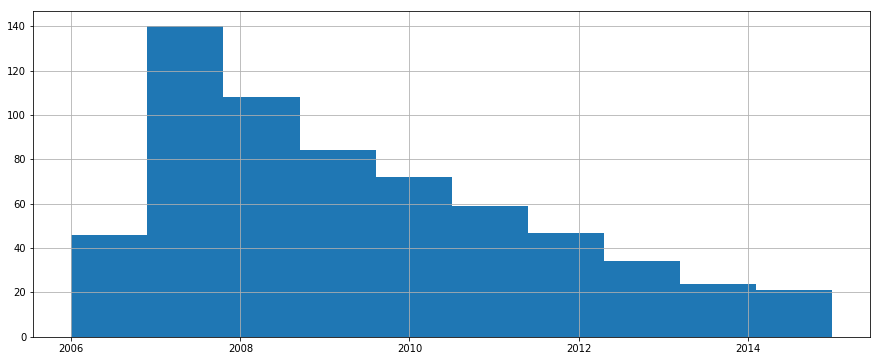

In [38]:
rating_year = df_ratings.loc[df_ratings.movieId==47810].date_time.dt.year
rating_year.hist(bins=rating_year.nunique(), figsize=(15,6))

In [28]:
rating_year.nunique()

10

In [22]:
df_ratings.loc[df_ratings.movieId==47810].date_time.hist()

/home/msnow/miniconda3/envs/data_sci/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)
